In [1]:
#데이터 다운로드
#https://www.kaggle.com/danagerous/sleep-data

#데이터 전처리 레퍼런스
#https://www.kaggle.com/jumpingmandt/sleep-data-study

In [5]:
#데이터 업로드
import numpy as np
import pandas as pd
import csv

df = pd.read_csv('C:/Users/ixxxxu/Desktop/sleep_study_mne/mne-python/app_data/sleepdata.csv',delimiter =";")
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


In [ ]:
#입면시각,기상시각,총수면시각 등 시간데이터 타입에 대한 정제 필요

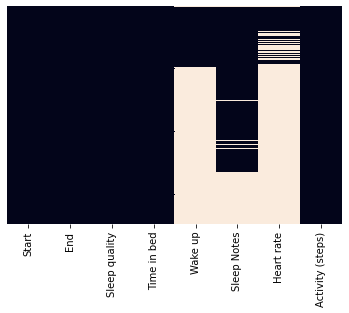

In [10]:
#결측치 시각화
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

In [11]:
#입면시간과 출면(기상)시간 데이터타입 -> datetime 변환
import time
import datetime

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [12]:
#총 수면시간 구하기 및 데이터타입 변환(초)
df['Time in bed'] = df['End'] - df['Start']
df['Time in bed'] = df['Time in bed'].astype('timedelta64[s]')

In [13]:
#수면품질 데이터 타입 변환(srt -> float)
df['Sleep quality'] = df['Sleep quality'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(int)

In [14]:
df['Start time'] = pd.Series([val.time() for val in df['Start']])
df['End time'] = pd.Series([val.time() for val in df['End']])

In [61]:
#데이터타입 변환 
print(df['Start time'][0])
print(type(df['Start time']))

22:57:49
<class 'pandas.core.series.Series'>


In [15]:
#시,분,초 => 초 단위로 합산 한 특성 생성
df['Start time in second'] = df['Start time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df['End time in second'] = df['End time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)

In [66]:
#입면시각, 기상시각, 총 수면시간, 수면의 질 간의 상관관계를 파악하기 위한 전처리
print(df['Start time in second'][0])
print(df['End time in second'][0])
print(df['Time in bed'][0])
print(df['Sleep quality'][0])

82669
27013
30744.0
100


Text(0.5, 1.0, 'Correlation')

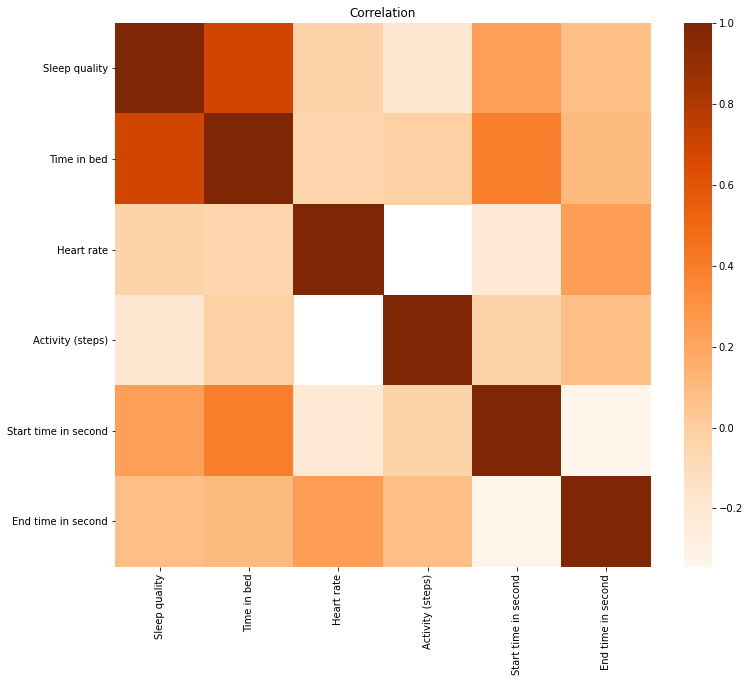

In [16]:
#상관관계 시각화
import matplotlib.pyplot as plt
# visualisation of this correlation
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df.corr(),cmap='Oranges')
# set title
r.set_title('Correlation')

- 수면의 질은 침대에서 보낸 시간과 높은 상관관게가 있다

In [67]:
#수면의 질과 높은 상관관계를 지닌 특성 확인
df.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.695206
Start in hour           0.234936
Start time in second    0.234936
Wake up                 0.110043
End in hour             0.076523
End time in second      0.076523
Heart rate             -0.037846
Activity (steps)       -0.190491
Name: Sleep quality, dtype: float64

In [68]:
#결측치 처리를 위한 기상 후 감정 상태를 기록한 Wake up 특성 값 숫자 맵핑
df['Wake up'] = df['Wake up'].replace({':)':2, ':|':1, ':(':0})

In [20]:
#주요 특성을 담은 데이터프레임 생성
df2 = df[["Sleep quality", "Wake up", "Time in bed", "Start time in second", "End time in second","Activity (steps)"]]

In [21]:
#결측치 제거
df2 = df2.dropna()

In [22]:
#데이터 타입 변환
df2['Wake up'] = df2['Wake up'].astype('int')

In [23]:
#전처리후 상관관계 확인 -> 
df2.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.783920
Start time in second    0.204848
Wake up                 0.110043
End time in second      0.000204
Activity (steps)             NaN
Name: Sleep quality, dtype: float64

In [24]:
df3 = df[["Sleep quality", "Wake up","Heart rate","Time in bed", "Start time in second", "End time in second"]]

In [25]:
# Drop the NaN elements
df3 = df3.dropna()
df3['Wake up'] = df3['Wake up'].astype('int')

In [26]:
# Let's check the correlations of features to the "sleep quality"
df3.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.721956
Start time in second    0.093086
Wake up                 0.024268
Heart rate             -0.037846
End time in second     -0.173543
Name: Sleep quality, dtype: float64

Text(0.5, 1.0, 'Correlation')

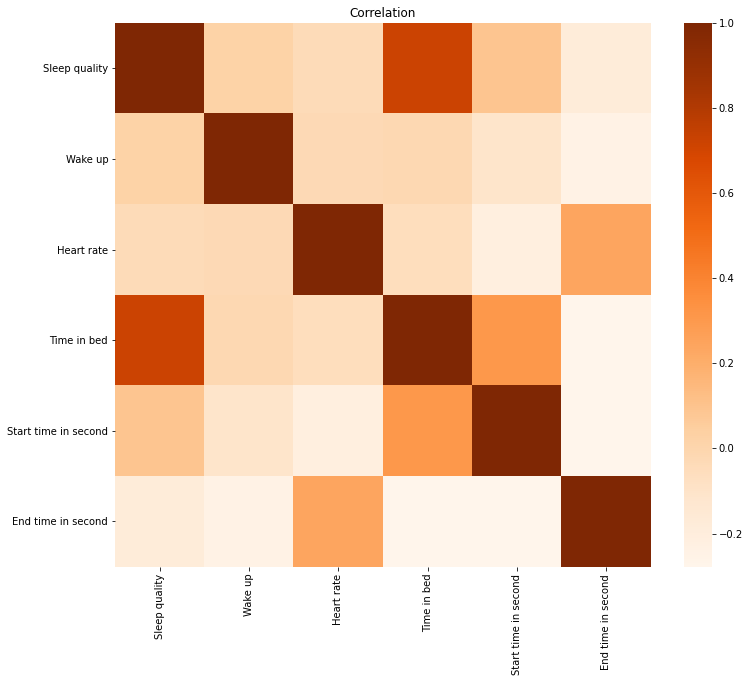

In [27]:
# visualisation of this correlation
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df3.corr(),cmap='Oranges')
# set title
r.set_title('Correlation')

### EDA

C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

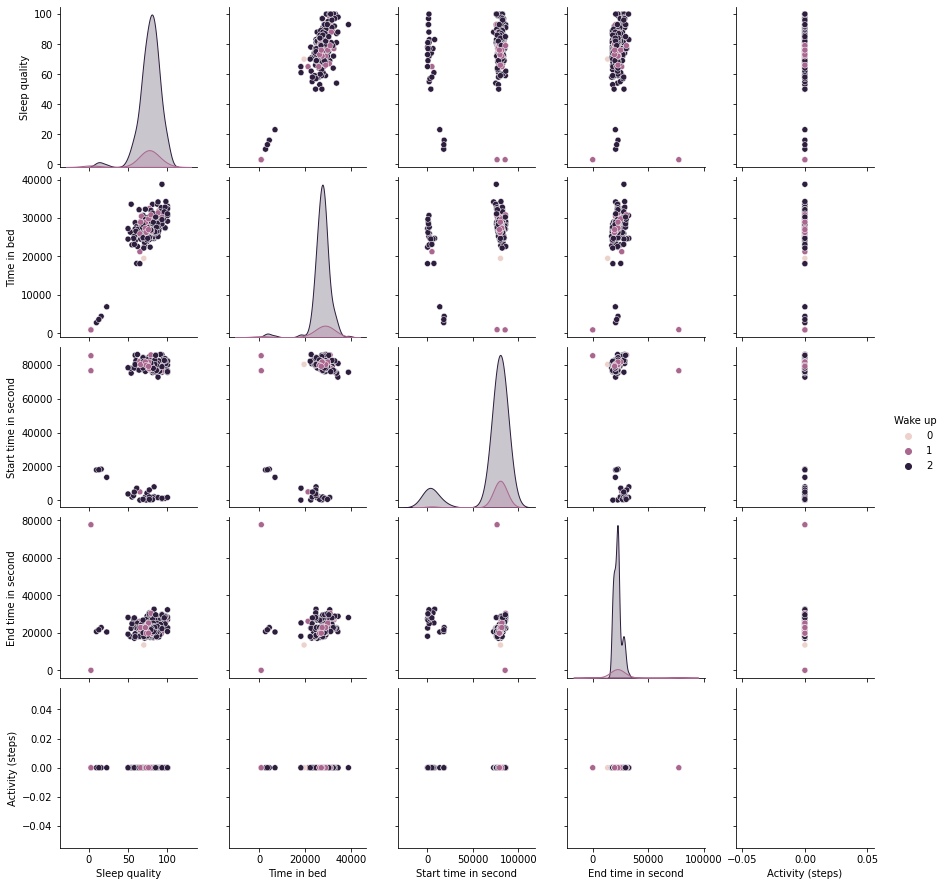

In [28]:
# Pairplot
sns.pairplot(df2, hue='Wake up')

C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


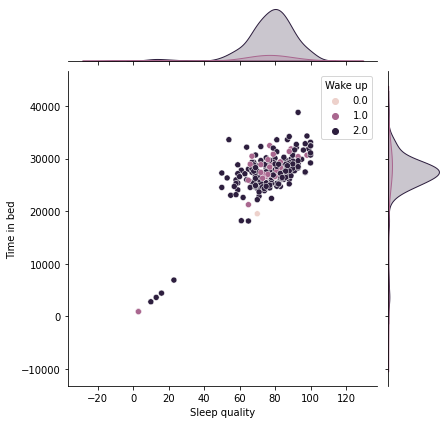

In [32]:
# Joint plot of features "Sleep quality" and "Time in bed" with unit second.
#sns.jointplot(x='Sleep quality',y='Time in bed',data=df,color='orange',kind = 'kde')
sns.jointplot(data=df, x="Sleep quality", y="Time in bed", hue="Wake up");


In [33]:
# The average of "Time in bed"

print ('The average time in bed of these users is :', df['Time in bed'].mean(), 'second')
print ('The average time in bed of these users is :', df['Time in bed'].mean()/3600, 'hour')

The average time in bed of these users is : 27545.25479143179 second
The average time in bed of these users is : 7.651459664286609 hour


Text(0, 0.5, 'Count')

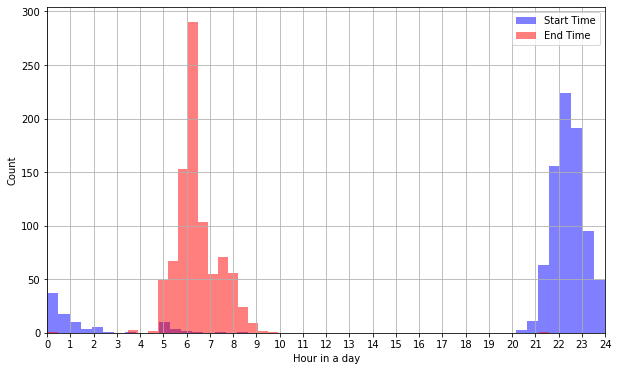

In [34]:
# The Histogram of Start time and End time
plt.figure(figsize=(10,6))
df['Start in hour'] = df['Start time in second'].apply(lambda x: x/3600)
df['End in hour'] = df['End time in second'].apply(lambda x: x/3600)
df['Start in hour'].hist(alpha=0.5,color='blue',label='Start Time',bins=50)
df['End in hour'].hist(alpha=0.5,color='red',label='End Time',bins=50)
plt.legend()
plt.xlim((0, 24)) 
plt.xticks(np.arange(0, 25, 1))
plt.xlabel('Hour in a day')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

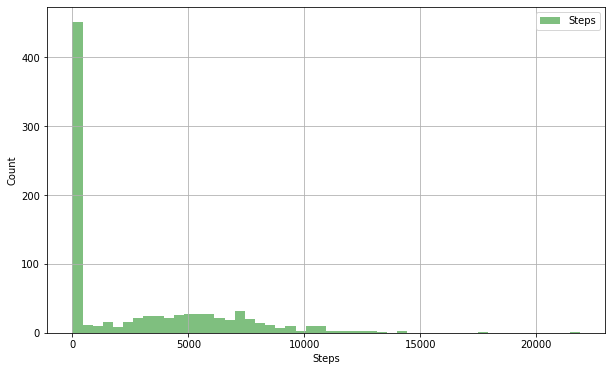

In [35]:
# The Histogram of Steps
plt.figure(figsize=(10,6))
df['Activity (steps)'].hist(alpha=0.5,color='green',label='Steps',bins=50)
plt.legend()

plt.xlabel('Steps')
plt.ylabel('Count')

C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ixxxxu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


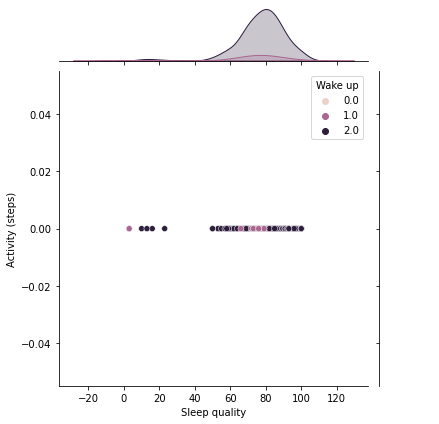

In [37]:
# Joint plot of features "Sleep quality" and "Activity" with unit second.
sns.jointplot(data=df, x="Sleep quality", y='Activity (steps)', hue="Wake up");

In [38]:
# Drop the non-meaning value of steps (0)

df_new = df[df['Activity (steps)'] != 0]
df_new

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start time,End time,Start time in second,End time in second,Start in hour,End in hour
411,2016-08-17 22:42:29,2016-08-18 06:15:46,78,27197.0,NaN,Ate late:Drank coffee:Worked out,NaN,7200,22:42:29,06:15:46,81749,22546,22.708056,6.262778
412,2016-08-18 21:58:44,2016-08-19 06:23:31,36,30287.0,NaN,Drank coffee:Worked out,NaN,3444,21:58:44,06:23:31,79124,23011,21.978889,6.391944
413,2016-08-20 22:04:29,2016-08-21 08:33:27,56,37738.0,NaN,Drank coffee,NaN,7901,22:04:29,08:33:27,79469,30807,22.074722,8.557500
414,2016-08-21 22:08:40,2016-08-22 06:20:25,52,29505.0,NaN,Drank coffee:Drank tea,NaN,3786,22:08:40,06:20:25,79720,22825,22.144444,6.340278
415,2016-08-22 22:13:35,2016-08-23 06:22:47,35,29352.0,NaN,Drank coffee:Worked out,NaN,2668,22:13:35,06:22:47,80015,22967,22.226389,6.379722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91,32881.0,NaN,NaN,NaN,56,21:54:14,07:02:15,78854,25335,21.903889,7.037500
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81,25894.0,NaN,NaN,NaN,64,23:49:19,07:00:53,85759,25253,23.821944,7.014722
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71,32207.0,NaN,NaN,NaN,3316,21:24:05,06:20:52,77045,22852,21.401389,6.347778
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80,33239.0,NaN,NaN,NaN,6555,21:36:32,06:50:31,77792,24631,21.608889,6.841944


In [39]:
# Let's check the correlations of features to the "sleep quality"
df_new.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.647258
Start in hour           0.192031
Start time in second    0.192031
End time in second      0.163342
End in hour             0.163342
Activity (steps)       -0.136605
Wake up                      NaN
Heart rate                   NaN
Name: Sleep quality, dtype: float64

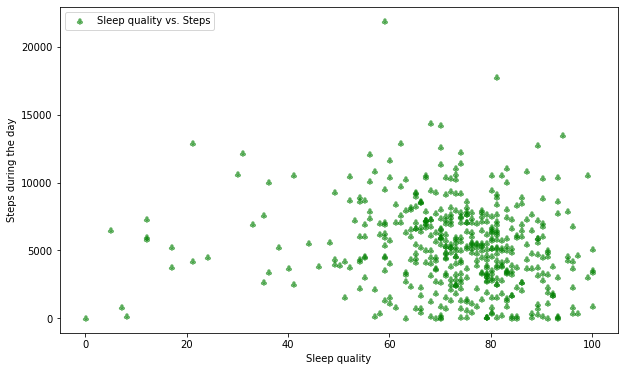

In [40]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_new['Sleep quality'],df_new['Activity (steps)'], c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Sleep quality vs. Steps")
plt.xlabel("Sleep quality")
plt.ylabel("Steps during the day")
plt.legend(loc='upper left')
plt.show()

### ML

In [41]:
# We use features of "Time in bed","Start time in second", "End time in second" and "Activity (steps)" to predict the feature "Sleep quality"
# We choose to use df
X = df[['Time in bed', 'Start time in second','End time in second','Activity (steps)']].values
y = df['Sleep quality'].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [43]:
# In order to normalize the features, it is better to use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#baseline 모델
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

print('test accuracy:', lm.score(X_test,y_test))

test accuracy: 0.41236039548039705


Text(0, 0.5, 'Error Rate')

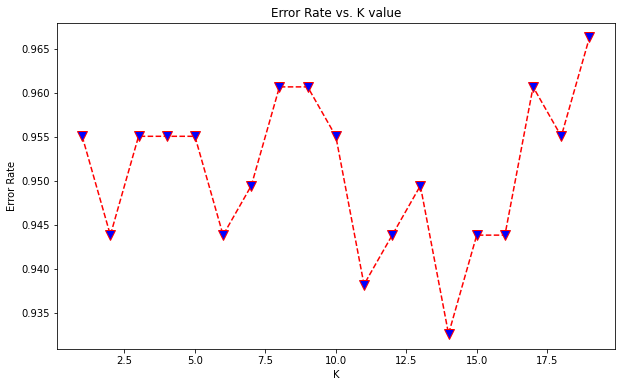

In [45]:
#KNN 모델
from sklearn.neighbors import KNeighborsClassifier

error_rate =[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, color ='red',linestyle='dashed',marker='v',
        markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
knn = KNeighborsClassifier(n_neighbors=14) # why 5 is because of Elbow method
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [47]:
print('test accuracy:', knn.score(X_test,y_test))

test accuracy: 0.06741573033707865


In [48]:
#로지스틱회귀 모델
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
print('test accuracy:', logmodel.score(X_test,y_test))

test accuracy: 0.03932584269662921


In [49]:
#결정트리 모델
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('test accuracy:', dtree.score(X_test,y_test))

test accuracy: 0.033707865168539325


In [50]:
#랜덤트리 모델
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
print('test accuracy:', rfc.score(X_test,y_test))

test accuracy: 0.056179775280898875


In [51]:
#SVM 모델
# First SVM model
from sklearn.svm import SVC
svm=SVC(random_state=101)
svm.fit(X_train, y_train)
print('train accuracy:', svm.score(X_train,y_train))
print('test accuracy:', svm.score(X_test,y_test))

train accuracy: 0.06770098730606489
test accuracy: 0.033707865168539325


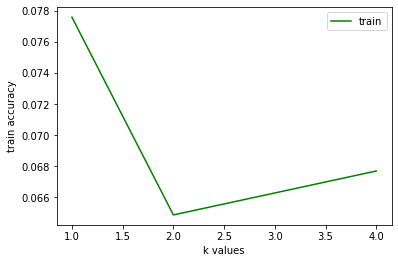

In [52]:
#Select K-bset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train=[]
k=np.arange(1,5,1)
for each in k:
    x_new = SelectKBest(f_classif, k = each).fit_transform(X_train,y_train)
    svm.fit(x_new, y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))
    
plt.plot(k, accuracy_list_train, color='green', label='train')
plt.xlabel('k values')
plt.ylabel('train accuracy')
plt.legend()
plt.show()

In [53]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df3 = pd.DataFrame(data=d)
print ('max accuracy:', df3['train_score'].max())
print ('max accuracy id:', df3['train_score'].idxmax())

max accuracy: 0.07757404795486601
max accuracy id: 0


In [54]:
# To sum up,
print ('Using the normalisation preprocessing: \n'
    'Linear Regresion Model precision:',lm.score(X_test,y_test),'\n',
    'KNN Model precision:', knn.score(X_test,y_test),'\n',
      'Logistic Regression Model precision:',logmodel.score(X_test,y_test),'\n',
      'Decision Tree Model precision:', dtree.score(X_test,y_test),'\n',
      'Random Tree Model precision:', rfc.score(X_test,y_test),'\n',
      'Support Machine Vector precision:', svm.score(X_test,y_test))

Using the normalisation preprocessing: 
Linear Regresion Model precision: 0.41236039548039705 
 KNN Model precision: 0.06741573033707865 
 Logistic Regression Model precision: 0.03932584269662921 
 Decision Tree Model precision: 0.033707865168539325 
 Random Tree Model precision: 0.056179775280898875 
 Support Machine Vector precision: 0.033707865168539325


In [ ]:
#Google AutoML 적용
